In [2]:
import math
import statistics
import scipy.stats
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
df_property = pd.read_csv('nyc-rolling-sales.csv', na_values=[' -  '] )
df_property.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00


# Exploration data

In [4]:
df_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            84548 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       84548 non-null  object 
 8   BUILDING CLASS AT PRESENT       84548 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                84548 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [5]:
df_property.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [6]:
df_property = df_property.drop(['Unnamed: 0',
                  'NEIGHBORHOOD', 
                  'BUILDING CLASS CATEGORY', 
                  'EASE-MENT', 
                  'ADDRESS', 
                  'APARTMENT NUMBER', 
                  'ZIP CODE', 
                  'LAND SQUARE FEET', 
                  'GROSS SQUARE FEET',
                  'SALE DATE'], axis=1)

In [7]:
df_property

,BOROUGH,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,2A,392,6,C2,5,0,5,1900,2,C2,6625000.0
1,1,2,399,26,C7,28,3,31,1900,2,C7,NaN
2,1,2,399,39,C7,16,1,17,1900,2,C7,NaN
3,1,2B,402,21,C4,10,0,10,1913,2,C4,3936272.0
4,1,2A,404,55,C2,6,0,6,1900,2,C2,8000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,1,7349,34,B9,2,0,2,1998,1,B9,450000.0
84544,5,1,7349,78,B9,2,0,2,1998,1,B9,550000.0
84545,5,1,7351,60,B2,2,0,2,1925,1,B2,460000.0
84546,5,4,7100,28,K6,0,7,7,2001,4,K6,11693337.0


In [8]:
df_property['SALE PRICE'].fillna(0, inplace=True)
df_property

,BOROUGH,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,2A,392,6,C2,5,0,5,1900,2,C2,6625000.0
1,1,2,399,26,C7,28,3,31,1900,2,C7,0.0
2,1,2,399,39,C7,16,1,17,1900,2,C7,0.0
3,1,2B,402,21,C4,10,0,10,1913,2,C4,3936272.0
4,1,2A,404,55,C2,6,0,6,1900,2,C2,8000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,1,7349,34,B9,2,0,2,1998,1,B9,450000.0
84544,5,1,7349,78,B9,2,0,2,1998,1,B9,550000.0
84545,5,1,7351,60,B2,2,0,2,1925,1,B2,460000.0
84546,5,4,7100,28,K6,0,7,7,2001,4,K6,11693337.0


In [9]:
condition = (df_property["SALE PRICE"] > 1000)

In [10]:
df_property = df_property[condition]
df_property

,BOROUGH,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,2A,392,6,C2,5,0,5,1900,2,C2,6625000.0
3,1,2B,402,21,C4,10,0,10,1913,2,C4,3936272.0
4,1,2A,404,55,C2,6,0,6,1900,2,C2,8000000.0
6,1,2B,406,32,C4,8,0,8,1920,2,C4,3192840.0
9,1,2,387,153,D9,24,0,24,1920,2,D9,16232000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,1,7349,34,B9,2,0,2,1998,1,B9,450000.0
84544,5,1,7349,78,B9,2,0,2,1998,1,B9,550000.0
84545,5,1,7351,60,B2,2,0,2,1925,1,B2,460000.0
84546,5,4,7100,28,K6,0,7,7,2001,4,K6,11693337.0


# Mean, Median, Mode, Range, Variance and Standart Deviation

In [11]:
new_df = df_property.groupby('BUILDING CLASS AT PRESENT').agg(
    MAX_PRICE = pd.NamedAgg(column='SALE PRICE', aggfunc=max),
    MIN_PRICE = pd.NamedAgg(column='SALE PRICE', aggfunc=min),
    RANGE_PRICE = pd.NamedAgg(
        column="SALE PRICE", 
        aggfunc=lambda x: (max(x) - min(x)))    
)

new_df

,MAX_PRICE,MIN_PRICE,RANGE_PRICE
BUILDING CLASS AT PRESENT,,,
,250867763.0,10140.0,250857623.0
A0,2450000.0,170000.0,2280000.0
A1,5200000.0,5000.0,5195000.0
A2,2600000.0,10000.0,2590000.0
A3,11900000.0,2500.0,11897500.0
...,...,...,...
W8,975000.0,975000.0,0.0
W9,17000000.0,10000.0,16990000.0
Y3,16000000.0,7211750.0,8788250.0


In [12]:
new_df['AMOUNT BUILDING CATEGORY'] = df_property['BUILDING CLASS AT PRESENT'].value_counts().sort_index(ascending=True)

In [13]:
new_df.drop(' ', axis=0, inplace=True)

In [14]:
new_df['MEAN PRICE'] = df_property.groupby('BUILDING CLASS AT PRESENT', sort=True)['SALE PRICE'].mean()

In [15]:
new_df['VARIANCE PRICE'] = df_property.groupby('BUILDING CLASS AT PRESENT', sort=True)['SALE PRICE'].var()

In [16]:
new_df['STANDART DEVIATION PRICE'] = df_property.groupby('BUILDING CLASS AT PRESENT', sort=True)['SALE PRICE'].std()

In [17]:
new_df['MEDIAN PRICE'] = df_property.groupby('BUILDING CLASS AT PRESENT', sort=True)['SALE PRICE'].median()

In [18]:
new_df['MODE PRICE'] = df_property.groupby('BUILDING CLASS AT PRESENT', sort=True)['SALE PRICE'].agg(pd.Series.mode).to_frame()

## Is there a difference in unit sold based on building category?  

In [19]:
new_df.head()

,MAX_PRICE,MIN_PRICE,RANGE_PRICE,AMOUNT BUILDING CATEGORY,MEAN PRICE,VARIANCE PRICE,STANDART DEVIATION PRICE,MEDIAN PRICE,MODE PRICE
BUILDING CLASS AT PRESENT,,,,,,,,,
A0,2450000.0,170000.0,2280000.0,307,6.589439e+05,5.477221e+10,2.340346e+05,645000.0,"[750000.0, 800000.0]"
A1,5200000.0,5000.0,5195000.0,4729,6.312003e+05,1.712432e+11,4.138154e+05,525000.0,450000.0
A2,2600000.0,10000.0,2590000.0,1922,5.579471e+05,6.956193e+10,2.637460e+05,516103.5,450000.0
A3,11900000.0,2500.0,11897500.0,242,1.484771e+06,1.158120e+12,1.076160e+06,1242500.0,"[1300000.0, 1500000.0]"
A4,41000000.0,3000.0,40997000.0,138,4.839445e+06,3.834955e+13,6.192702e+06,2638750.0,"[1250000.0, 1750000.0, 2100000.0]"


# Confidence Intervals

In [20]:
# Collect the data
A0_mean_price = new_df.loc['A0']['MEAN PRICE']
A0_std_price = new_df.loc['A0']['STANDART DEVIATION PRICE']
A0_n = new_df.loc['A0']['AMOUNT BUILDING CATEGORY']
A0_z = 1.96

In [21]:
# Calculate the standard eror using formula for the standard eror of the mean
se = A0_std_price / np.sqrt(A0_n)

In [22]:
# Construct the CI (Confidence Intervals)
lcb = A0_mean_price - A0_z * se # Lower limit of tbe CI
ucb = A0_mean_price + A0_z * se # Lower limit of tbe CI

lcb, ucb

(632764.0967581846, 685123.7794633139)

Berarti rata rata True mean dari **Sale price of class building A0 in new york** akan dijual disekitar harga **USD 632764.0967581846** dan **USD 685123.7794633139**

# Probability Distribution

## Uniform distribution

In [23]:
from scipy.stats import uniform
import seaborn as sns

In [24]:
# Random numbers from uniform distribution
n = new_df.loc['A0']['AMOUNT BUILDING CATEGORY']
start = new_df.loc['A0']['MEAN PRICE']
width = new_df.loc['A0']['STANDART DEVIATION PRICE']
data_uniform = uniform.rvs(size=n, loc=start, scale=width)

C:\Users\HAIKAL~1\AppData\Local\Temp/ipykernel_14596/2050125755.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_uniform, bins=15, kde=True)


[Text(0.5, 0, 'Uniform Distribution'), Text(0, 0.5, 'Frequency')]

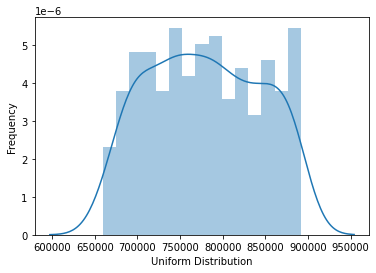

In [25]:
ax = sns.distplot(data_uniform, bins=15, kde=True)
ax.set(xlabel='Uniform Distribution', ylabel='Frequency')

## Normal Distribution

In [26]:
from scipy.stats import norm

data_normal = norm.rvs(size=n, loc=start, scale=width)

C:\Users\HAIKAL~1\AppData\Local\Temp/ipykernel_14596/1740572072.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_normal, bins=15, kde=True)


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

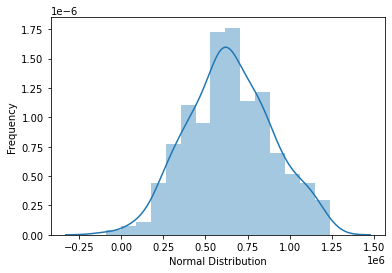

In [27]:
ax = sns.distplot(data_normal, bins=15, kde=True)
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

## Gamma Distribution

In [28]:
from scipy.stats import gamma

data_gamma = gamma.rvs(a=5, size=n) # a = 5 for Gamma Distribution 

C:\Users\HAIKAL~1\AppData\Local\Temp/ipykernel_14596/248974906.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_gamma, bins=15, kde=True)


[Text(0.5, 0, 'Gamma Distribution'), Text(0, 0.5, 'Frequency')]

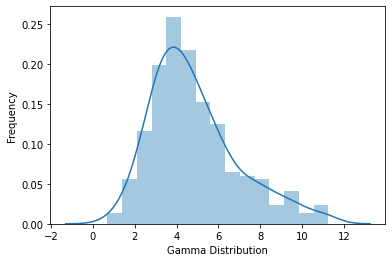

In [29]:
ax = sns.distplot(data_gamma, bins=15, kde=True)
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

## Exponential Distribution

In [30]:
from scipy.stats import expon

data_expon = expon.rvs(size=n, scale=1, loc=start)

C:\Users\HAIKAL~1\AppData\Local\Temp/ipykernel_14596/3221385439.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_expon, bins=15, kde=True)


[Text(0.5, 0, 'Exponential Distribution'), Text(0, 0.5, 'Frequency')]

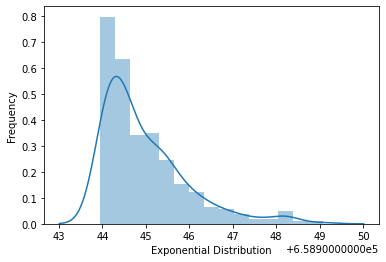

In [31]:
ax = sns.distplot(data_expon, bins=15, kde=True)
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')

## Poisson Distribution

In [32]:
from scipy.stats import poisson

data_poisson = poisson.rvs(size=n, mu=3)

C:\Users\HAIKAL~1\AppData\Local\Temp/ipykernel_14596/479202893.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_poisson, bins=30, kde=False)


[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

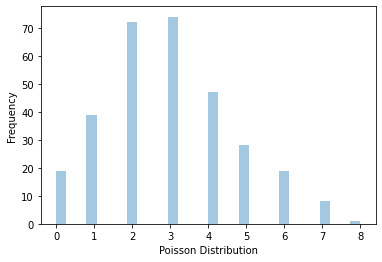

In [33]:
ax = sns.distplot(data_poisson, bins=30, kde=False)
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

## Binomial Distribution 

In [34]:
from scipy.stats import binom

data_binom = binom.rvs(size=n, n=10, p=0.8)

C:\Users\HAIKAL~1\AppData\Local\Temp/ipykernel_14596/1385538334.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_binom, bins=30, kde=False)


[Text(0.5, 0, 'Binomial Distribution'), Text(0, 0.5, 'Frequency')]

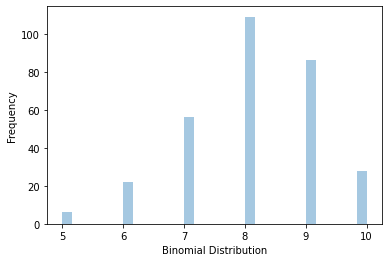

In [35]:
ax = sns.distplot(data_binom, bins=30, kde=False)
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

## Bernoulli Distribution 

In [36]:
from scipy.stats import bernoulli

data_bernoulli = bernoulli.rvs(size=n, p=0.6)

C:\Users\HAIKAL~1\AppData\Local\Temp/ipykernel_14596/163852866.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_bernoulli, kde=False)


[Text(0.5, 0, 'Bernoulli Distribution'), Text(0, 0.5, 'Frequency')]

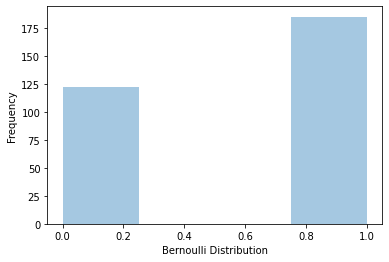

In [37]:
ax = sns.distplot(data_bernoulli, kde=False)
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

# Hypothesis Testing

## Is there a difference in unit sold between Manhattam & Brooklyn? 

In [38]:
new_df_property = df_property[(df_property['YEAR BUILT'] >= 1900) & (df_property['YEAR BUILT'] <= 2000)]
new_df_property

,BOROUGH,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,2A,392,6,C2,5,0,5,1900,2,C2,6625000.0
3,1,2B,402,21,C4,10,0,10,1913,2,C4,3936272.0
4,1,2A,404,55,C2,6,0,6,1900,2,C2,8000000.0
6,1,2B,406,32,C4,8,0,8,1920,2,C4,3192840.0
9,1,2,387,153,D9,24,0,24,1920,2,D9,16232000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
84540,5,1,7316,93,B2,2,0,2,1995,1,B2,509000.0
84541,5,1,7317,126,B2,2,0,2,1994,1,B2,648000.0
84543,5,1,7349,34,B9,2,0,2,1998,1,B9,450000.0
84544,5,1,7349,78,B9,2,0,2,1998,1,B9,550000.0


In [39]:
manhattan_900_910 = new_df_property[(new_df_property['YEAR BUILT'] <= 1910) & (new_df_property['BOROUGH'] == 1)]
bronx_900_910 = new_df_property[(new_df_property['YEAR BUILT'] <= 1910) & (new_df_property['BOROUGH'] == 2)]
brooklyn_900_910 = new_df_property[(new_df_property['YEAR BUILT'] <= 1910) & (new_df_property['BOROUGH'] == 3)]
queens_900_910 = new_df_property[(new_df_property['YEAR BUILT'] <= 1910) & (new_df_property['BOROUGH'] == 4)]
staten_island_900_910 = new_df_property[(new_df_property['YEAR BUILT'] <= 1910) & (new_df_property['BOROUGH'] == 5)]

In [40]:
n1 = len(manhattan_900_910)
mu1 = manhattan_900_910['SALE PRICE'].mean()
sd1 = manhattan_900_910['SALE PRICE'].std()

(n1, mu1, sd1)

(1718, 3992109.917345751, 9808277.36155531)

In [41]:
n2 = len(brooklyn_900_910)
mu2 = brooklyn_900_910['SALE PRICE'].mean()
sd2 = brooklyn_900_910['SALE PRICE'].std()

(n2, mu2, sd2)

(2074, 1361576.513500482, 1983141.7727224706)

In [70]:
sm.stats.ztest(manhattan_900_910["SALE PRICE"].dropna(), brooklyn_900_910["SALE PRICE"].dropna(), alternative='two-sided')

(11.923551871459132, 8.922197964344409e-33)

## Conclusion of the hypothesis test

Karena p-value (8.92e-33) sangat kecil, kita dapat **Reject the Null Hypothesis** bahwa rata rata penjualan berbeda secara signifikan antara kedua kota pada tahun 1910.

# Try and Error

## Is there a difference in unit sold between property built in 1900 - 1910? 

In [43]:
new_df_property = df_property[(df_property['YEAR BUILT'] >= 1900) & (df_property['YEAR BUILT'] <= 2000)]
new_df_property

,BOROUGH,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,2A,392,6,C2,5,0,5,1900,2,C2,6625000.0
3,1,2B,402,21,C4,10,0,10,1913,2,C4,3936272.0
4,1,2A,404,55,C2,6,0,6,1900,2,C2,8000000.0
6,1,2B,406,32,C4,8,0,8,1920,2,C4,3192840.0
9,1,2,387,153,D9,24,0,24,1920,2,D9,16232000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
84540,5,1,7316,93,B2,2,0,2,1995,1,B2,509000.0
84541,5,1,7317,126,B2,2,0,2,1994,1,B2,648000.0
84543,5,1,7349,34,B9,2,0,2,1998,1,B9,450000.0
84544,5,1,7349,78,B9,2,0,2,1998,1,B9,550000.0


In [44]:
new_df_property.drop(new_df_property.iloc[:, 0:8], axis=1, inplace=True)
new_df_property.drop(['TAX CLASS AT TIME OF SALE'], axis=1, inplace=True)

C:\Python\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:
new_df_property.rename(columns={'YEAR BUILT':'year_build', 'SALE PRICE':'sale_price', 'BUILDING CLASS AT TIME OF SALE':'building_class'}, inplace=True)
new_df_property

C:\Python\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,year_build,building_class,sale_price
0,1900,C2,6625000.0
3,1913,C4,3936272.0
4,1900,C2,8000000.0
6,1920,C4,3192840.0
9,1920,D9,16232000.0
...,...,...,...
84540,1995,B2,509000.0
84541,1994,B2,648000.0
84543,1998,B9,450000.0
84544,1998,B9,550000.0


In [46]:
df_property_price = new_df_property[new_df_property['year_build'] == 1900].groupby(['building_class']).agg({'sale_price': lambda x: max(x) - min(x)})

In [47]:
df_property_price.rename(columns={'sale_price':'1900'}, inplace=True)

In [48]:
df_property_price

,1900
building_class,
A1,0.0
A4,13925000.0
A5,0.0
A9,3140000.0
B1,1455000.0
B2,0.0
B3,900000.0
B9,0.0
C0,13520000.0


In [49]:
# for i in range(1901, 1911) :
#     new_df_property[new_df_property['year_build'] == i].groupby(['building_class']).agg({'sale_price': lambda x: max(x) - min(x)})

In [50]:
df_property_price['1901'] = new_df_property[new_df_property['year_build'] == 1901].groupby(['building_class']).agg({'sale_price': lambda x: max(x) - min(x)})

In [51]:
df_property_price['1902'] = new_df_property[new_df_property['year_build'] == 1902].groupby(['building_class']).agg({'sale_price': lambda x: max(x) - min(x)})

In [52]:
df_property_price['1903'] = new_df_property[new_df_property['year_build'] == 1903].groupby(['building_class']).agg({'sale_price': lambda x: max(x) - min(x)})

In [53]:
df_property_price['1904'] = new_df_property[new_df_property['year_build'] == 1904].groupby(['building_class']).agg({'sale_price': lambda x: max(x) - min(x)})

In [54]:
df_property_price['1905'] = new_df_property[new_df_property['year_build'] == 1905].groupby(['building_class']).agg({'sale_price': lambda x: max(x) - min(x)})

In [55]:
df_property_price['1906'] = new_df_property[new_df_property['year_build'] == 1906].groupby(['building_class']).agg({'sale_price': lambda x: max(x) - min(x)})

In [56]:
df_property_price['1907'] = new_df_property[new_df_property['year_build'] == 1907].groupby(['building_class']).agg({'sale_price': lambda x: max(x) - min(x)})

In [57]:
df_property_price['1908'] = new_df_property[new_df_property['year_build'] == 1908].groupby(['building_class']).agg({'sale_price': lambda x: max(x) - min(x)})

In [58]:
df_property_price['1909'] = new_df_property[new_df_property['year_build'] == 1909].groupby(['building_class']).agg({'sale_price': lambda x: max(x) - min(x)})

In [59]:
df_property_price['1910'] = new_df_property[new_df_property['year_build'] == 1910].groupby(['building_class']).agg({'sale_price': lambda x: max(x) - min(x)})

In [60]:
df_property_price.fillna(0.0, inplace=True)

In [61]:
df_property_price

,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910
building_class,,,,,,,,,,,
A1,0.0,2176000.0,0.0,0.0,0.0,2775000.0,0.0,0.0,0.0,0.0,3473500.0
A4,13925000.0,18950000.0,0.0,0.0,0.0,1415000.0,0.0,0.0,0.0,0.0,19777000.0
A5,0.0,9495000.0,0.0,0.0,0.0,1753356.0,0.0,0.0,0.0,0.0,5489000.0
A9,3140000.0,12597648.0,0.0,0.0,0.0,595000.0,0.0,0.0,0.0,0.0,7443000.0
B1,1455000.0,17497500.0,0.0,0.0,0.0,6980000.0,0.0,0.0,0.0,0.0,6980000.0
B2,0.0,2480818.0,0.0,0.0,0.0,3900000.0,0.0,0.0,0.0,0.0,4498000.0
B3,900000.0,5373000.0,0.0,0.0,0.0,14775000.0,0.0,0.0,0.0,0.0,7232050.0
B9,0.0,9386130.0,0.0,0.0,0.0,2088250.0,0.0,0.0,0.0,0.0,20975000.0
C0,13520000.0,10180000.0,0.0,0.0,0.0,6881000.0,0.0,0.0,0.0,1011000.0,27390500.0


In [62]:
n = 831
A1_mean = df_property_price.loc['A1'].mean()
A1_std = df_property_price.loc['A1'].std()

(A1_mean, A1_std)

(765863.6363636364, 1343457.6675673316)

In [63]:
n = 831
D4_mean = df_property_price.loc['D4'].mean()
D4_std = df_property_price.loc['D4'].std()

(D4_mean, D4_std)

(4682330.454545454, 4377213.19414797)

In [64]:
sm.stats.ztest(df_property_price.loc["A1"].dropna(), df_property_price.loc["D4"].dropna(), alternative='two-sided')

(-2.8369041799392973, 0.004555328082047953)

In [66]:
# Usefull for plotting later on 
years = list(map(str, range(1900, 1911)))
years

['1900',
 '1901',
 '1902',
 '1903',
 '1904',
 '1905',
 '1906',
 '1907',
 '1908',
 '1909',
 '1910']

In [67]:
df_A1 = df_property_price.loc[['A1', 'D4'], years]
df_A1

,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910
building_class,,,,,,,,,,,
A1,0.0,2176000.0,0.0,0.0,0.0,2775000.0,0.0,0.0,0.0,0.0,3473500.0
D4,5100000.0,1819128.0,3275000.0,1215000.0,75000.0,9491507.0,2685000.0,3315000.0,5720000.0,3350000.0,15460000.0


In [68]:
df_A1= df_A1.transpose()

<AxesSubplot:>

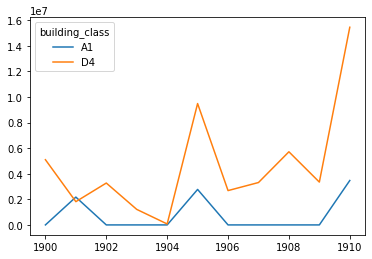

In [69]:
df_A1.plot()